<a href="https://colab.research.google.com/github/2203A52082/2082_DAUP/blob/main/2203A52082_DAUP_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/dermatology_database_1.csv")

# Convert 'age' column to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Fill missing 'age' values with the median
data['age'].fillna(data['age'].median(), inplace=True)

<ipython-input-3-7cdb8c786169>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


# Q1: Split the data and train SVM, RF

In [4]:
# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

SVM Accuracy: 0.7297297297297297
Random Forest Accuracy: 0.9864864864864865


# Q2: Find and remove outliers, then retrain

In [5]:
from sklearn.ensemble import IsolationForest

# Detect outliers using Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=42)
outliers = iso.fit_predict(X)

# Remove outliers
X_cleaned = X[outliers == 1]
y_cleaned = y[outliers == 1]

# Split into train and test sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Retrain SVM
svm_model.fit(X_train_cleaned, y_train_cleaned)
svm_preds_cleaned = svm_model.predict(X_test_cleaned)
svm_accuracy_cleaned = accuracy_score(y_test_cleaned, svm_preds_cleaned)

# Retrain Random Forest
rf_model.fit(X_train_cleaned, y_train_cleaned)
rf_preds_cleaned = rf_model.predict(X_test_cleaned)
rf_accuracy_cleaned = accuracy_score(y_test_cleaned, rf_preds_cleaned)

print("SVM Accuracy after outlier removal:", svm_accuracy_cleaned)
print("Random Forest Accuracy after outlier removal:", rf_accuracy_cleaned)

SVM Accuracy after outlier removal: 0.6363636363636364
Random Forest Accuracy after outlier removal: 0.9848484848484849


# Q3: Plot histograms for each column

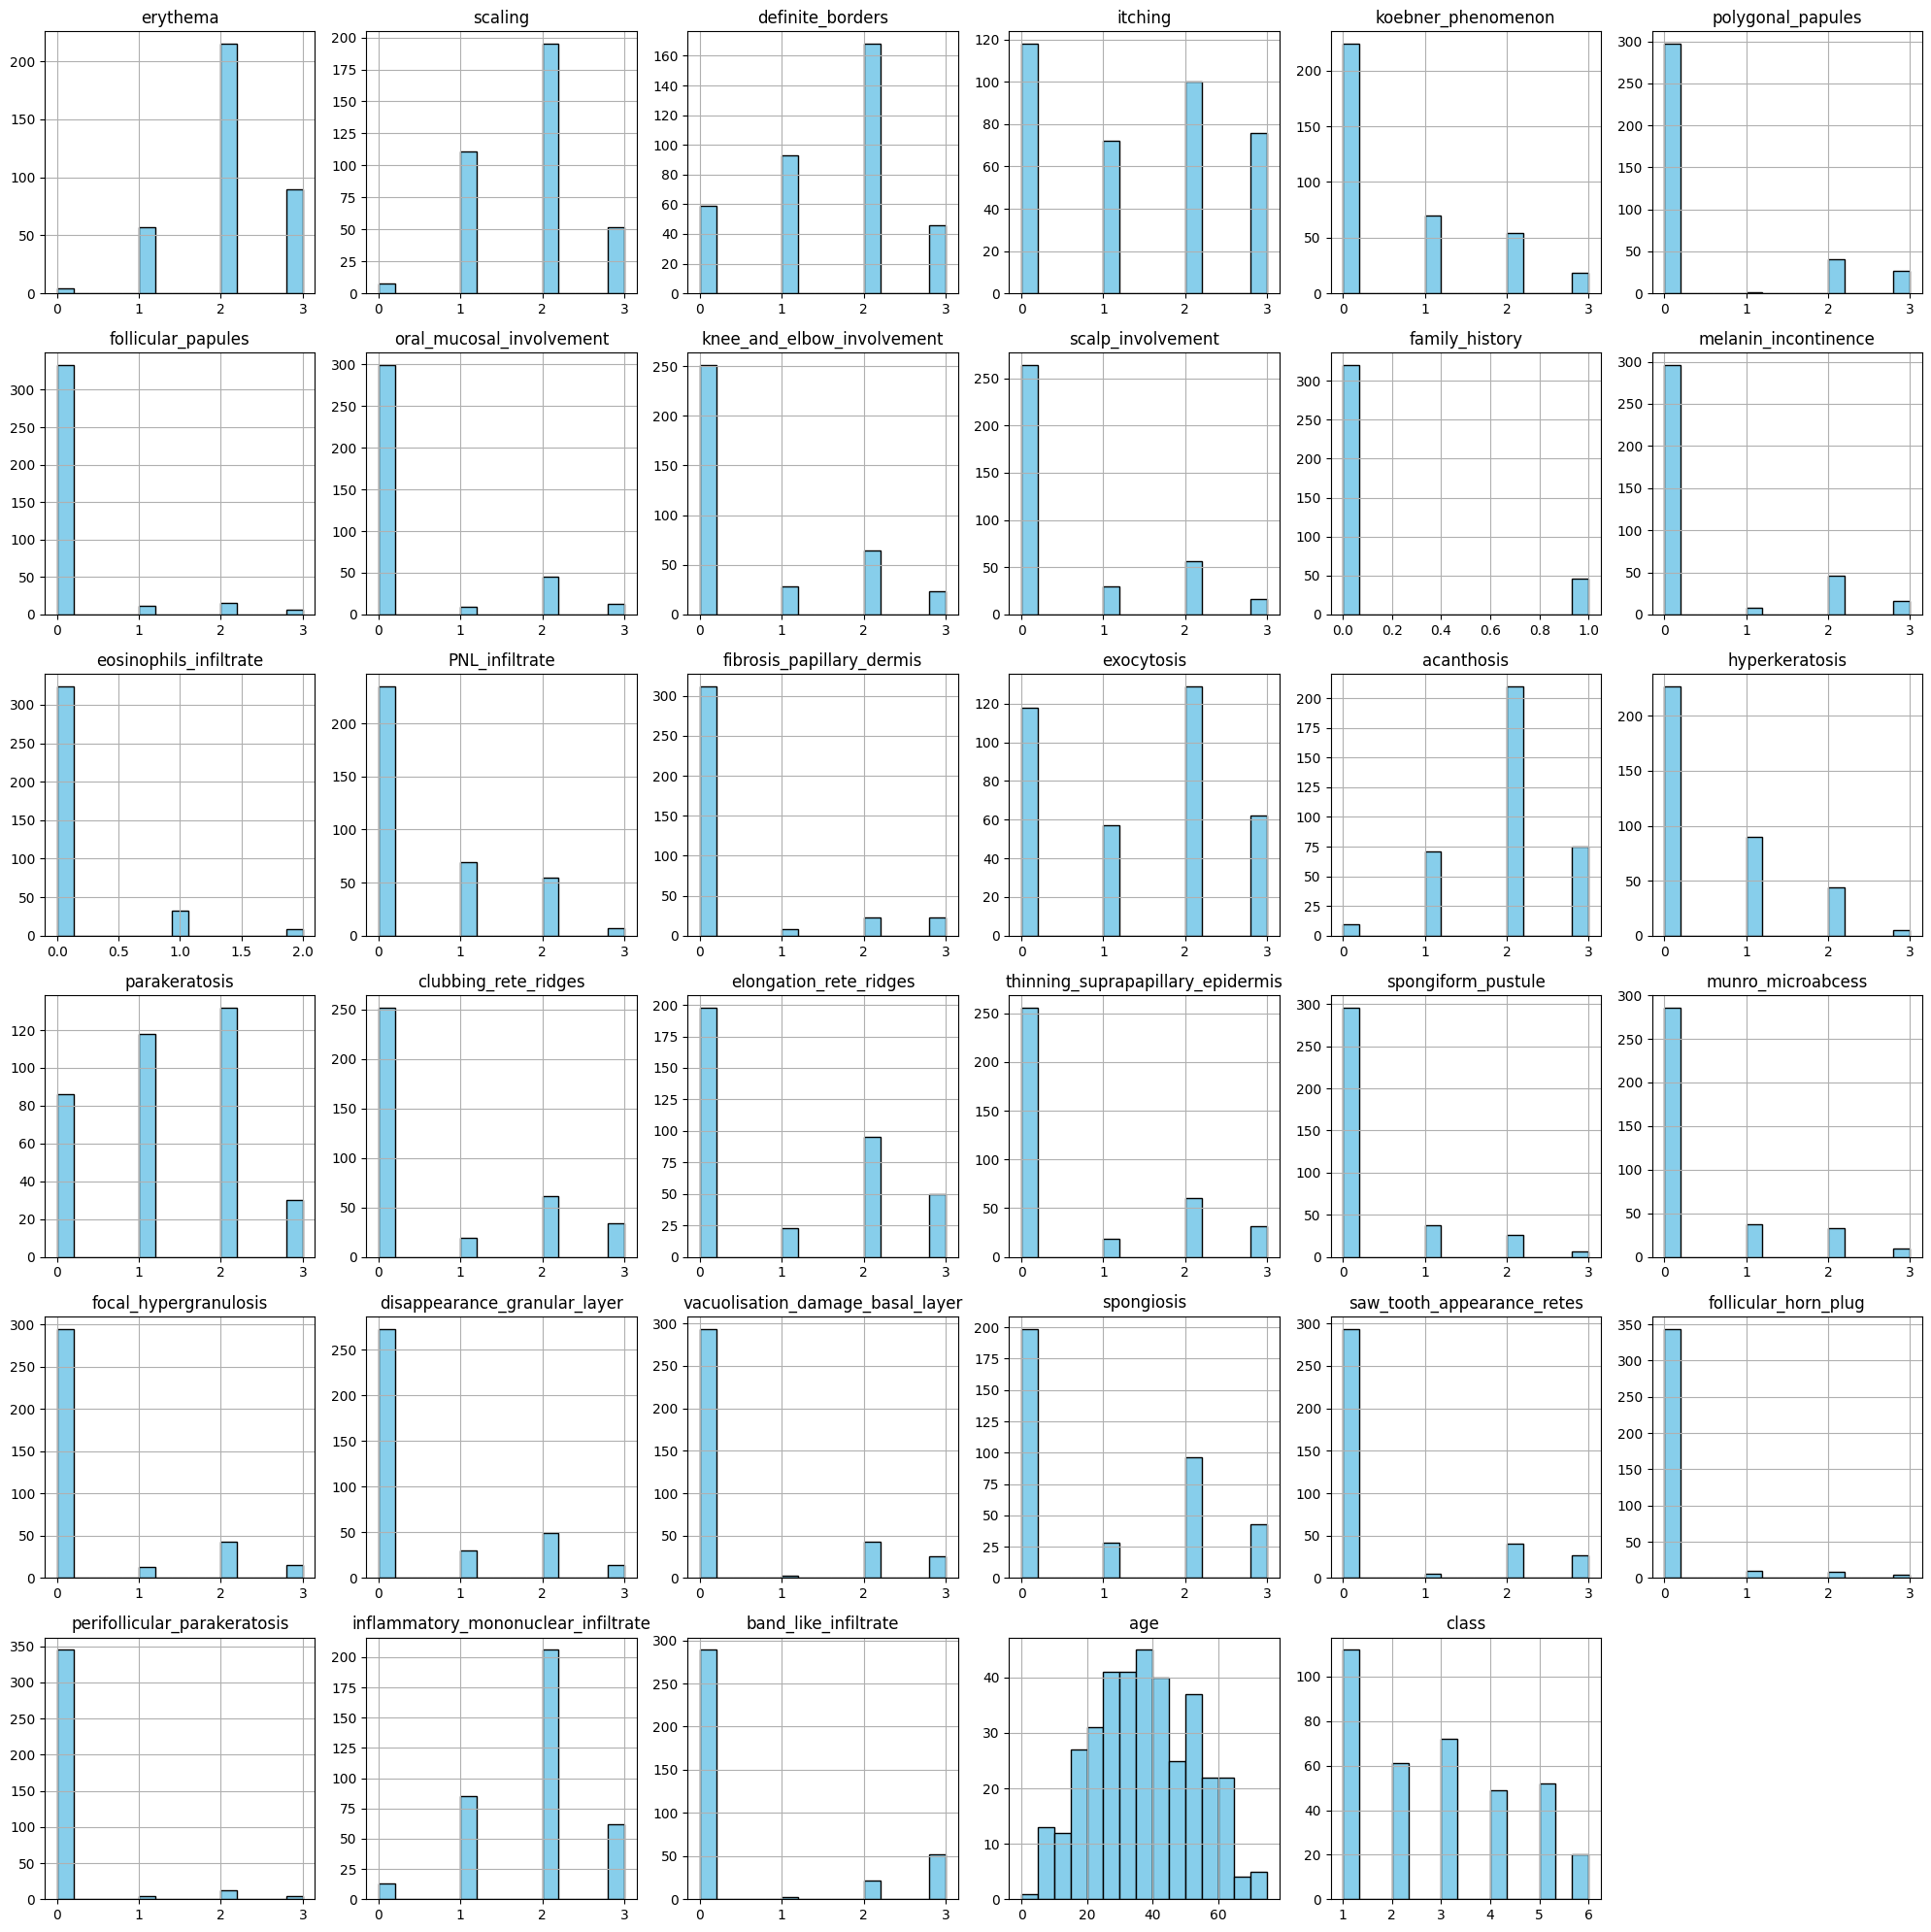

In [6]:
# Plot histograms for all columns
data.hist(figsize=(20, 20), bins=15, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

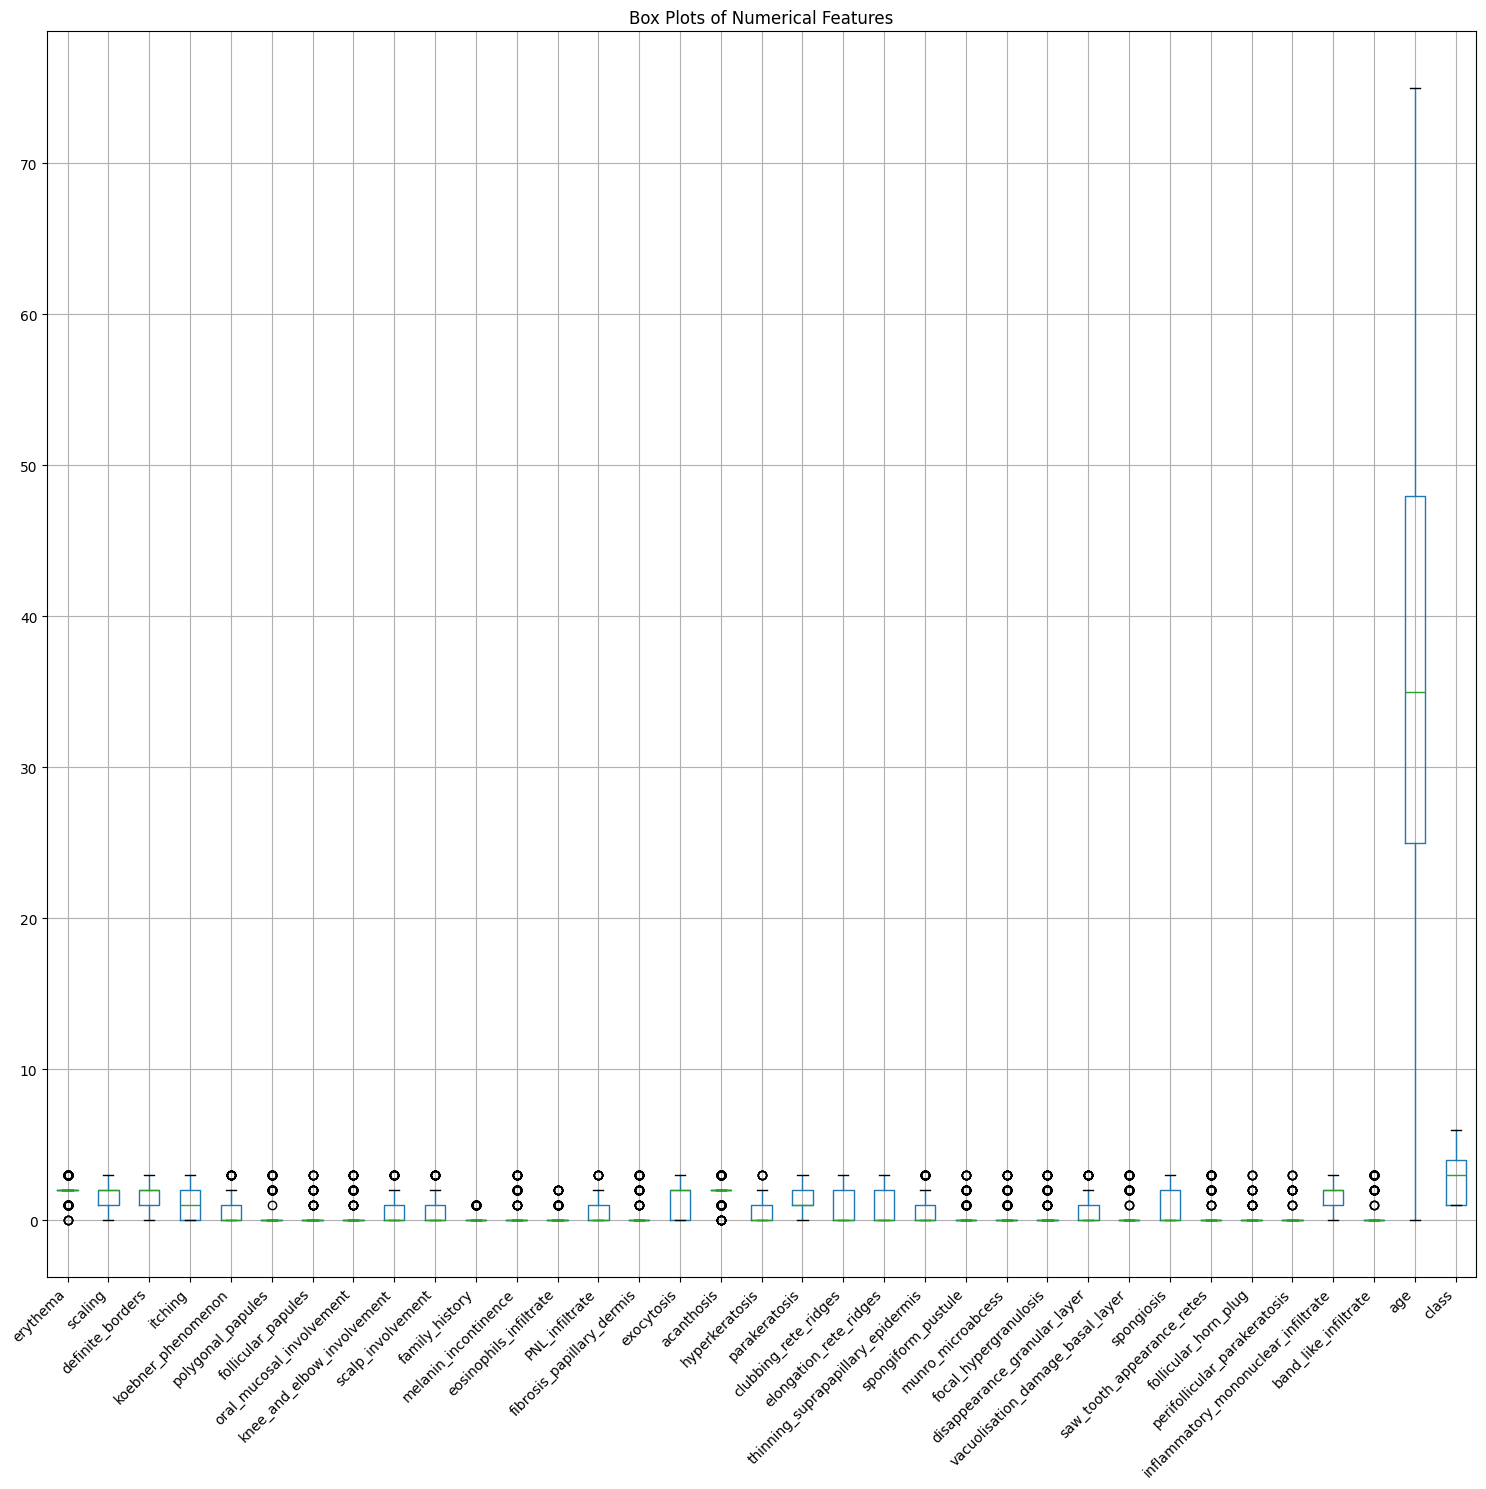

In [7]:
import matplotlib.pyplot as plt
data.boxplot(figsize=(15, 15))
plt.xticks(rotation=45, ha='right')
plt.title("Box Plots of Numerical Features")
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()